# Week 4 handin

## 01 Assignment

Use only numpy (not pandas) in these exercises
#### Exercise 1
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
```python
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}
```
Find out how many people lived in each of the 11 areas in 2015
4. Make a bar plot to show the size of each city area from the smallest to the largest
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk)
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

#### Exercise 2  A bit harder (Extra only if you have the time)

1. From "Danmarks Statistik" download demographic data here:
https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Code&delimiter=Semicolon&OMR%C3%85DE=000%2C084%2C147%2C400%2C085%2C083%2C082%2C081%2C851%2C461%2C561%2C751&K%C3%98N=1%2C2&ALDER=0%2C1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%2C26%2C27%2C28%2C29%2C30%2C31%2C32%2C33%2C34%2C35%2C36%2C37%2C3%2C39%2C40%2C41%2C42%2C43%2C44%2C45%2C46%2C47%2C48%2C49%2C50%2C51%2C52%2C53%2C54%2C55%2C56%2C57%2C58%2C59%2C60%2C61%2C62%2C63%2C64%2C65%2C66%2C67%2C68%2C69%2C70%2C71%2C72%2C73%2C74%2C75%2C76%2C77%2C78%2C79%2C80%2C81%2C82%2C83%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C91%2C92%2C93%2C94%2C95%2C96%2C97%2C98%2C99%2C100&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1


2. clean up the data so it only contains numbers. (If you find this hard to do then Pandas can help (we will cover it next week)
```python
import pandas as pd 
url = 'url from above here'
df = pd.read_csv(url,sep=';')
df['TID'] = df['TID'].map(lambda x:x[:-2]) #cut the last 2 characters
df.to_csv('demografic_cleaned.csv',header=False, index=False)
```
Now you have csv data with columns: OMRÅDE;KØN;ALDER;TID;INDHOLD
3. Now load your demographic data with numpy. (Hint: use np.loadtxt() with dtype and delimiter).
4. Use file: BY_KODER_demographics.csv to get cities from the city codes
5. Now find out which city in 2020 has the highest percentage of men (gender code 1),(Hint: create a function to return summed up data by city code ala: def summed_by_city(city_code): returning pct_male 
6. Create a line chart with 5 lines showing population changes in the 5 largest cities from 2008 to 2020



## 02 Status
Completed all EX1 tasks

## Exercise 1

### Exercise 1-3 setup
1. Open the file './data/befkbhalderstatkode.csv'
2. Turn the csv file into a numpy ndarray with `np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)`
3. Using this data:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}


In [4]:
import numpy as np
filename = "week4modules/befkbhalderstatkode.csv"

inputpop = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
dataset = inputpop

neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/Kgs. Enghave', 
          5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 
          10: 'Amager Vest', 99: 'Udenfor'}




### Exercise 4
Find out how many people lived in each of the 11 areas in 2015,                                                                                                              
 Make a bar plot to show the size of each city area from the smallest to the largest

Indre By has a population of 51937 people
Østerbro has a population of 75113 people
Nørrebro has a population of 78802 people
Vesterbro/Kgs. Enghave has a population of 61623 people
Valby has a population of 51727 people
Vanløse has a population of 39537 people
Brønshøj-Husum has a population of 43908 people
Bispebjerg has a population of 53604 people
Amager Øst has a population of 55205 people
Amager Vest has a population of 64967 people
Udenfor has a population of 3872 people
---Bar chart---


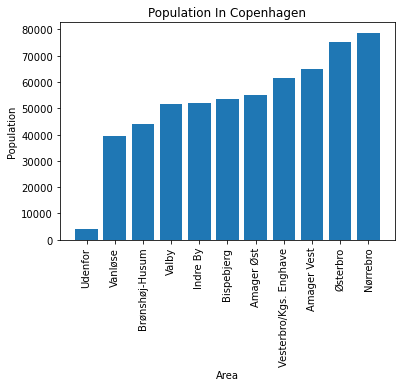

In [44]:
import matplotlib.pyplot as plt

def get_amount_of_people():
    set_of_people = {}
    for neighbh in neighb.keys():
        amount = dataset[(dataset[:,0] == 2015) & (dataset[:,1] == neighbh)]
        set_of_people[neighb.get(neighbh)] = amount[:,4].sum()
    return set_of_people

for key, value in get_amount_of_people().items():
        print(key, "has a population of", value, "people")


print("---Bar chart---")
tabledata = get_amount_of_people()
amount = sorted(tabledata.values())
area = sorted(tabledata, key=tabledata.get)

plt.figure()
plt.bar(area, amount)
plt.title("Population In Copenhagen")
plt.xlabel("Area")
plt.xticks(rotation=90)
plt.ylabel("Population")
plt.show(block=True)



### Excercise 5 & 6
5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
6. How many of those were from the other nordic countries (not dk) Disclaimer, could not figure out which countrycodes the nordic country has so i just checked for not dk in general)

In [56]:
amount = dataset[(dataset[:,0] == 2015) & (dataset[:,2] > 65)]
print("Copenhagen had a population of 65+ citizen in 2015 of: ", amount[:,4].sum())
print("Each area has the following amount of 65+:")
for neighbh in neighb.keys():
        pop_in_area = amount[amount[:,1] == neighbh]
        pop_in_area_not_dk = pop_in_area[pop_in_area[:,3] != 5100]
        print(neighb.get(neighbh), " Has ", pop_in_area[:,4].sum() , "people of 65+ age")
        print(pop_in_area_not_dk[:,4].sum(), " of those people is not DK nationality which is ",(pop_in_area_not_dk[:,4].sum()/pop_in_area[:,4].sum())*100 , "%")
        


Copenhagen had a population of 65+ citizen in 2015 of:  55750
Each area has the following amount of 65+:
Indre By  Has  6818 people of 65+ age
332  of those people is not DK nationality which is  4.8694631856849515 %
Østerbro  Has  8370 people of 65+ age
430  of those people is not DK nationality which is  5.137395459976105 %
Nørrebro  Has  5059 people of 65+ age
582  of those people is not DK nationality which is  11.504249851749359 %
Vesterbro/Kgs. Enghave  Has  3984 people of 65+ age
405  of those people is not DK nationality which is  10.16566265060241 %
Valby  Has  5397 people of 65+ age
263  of those people is not DK nationality which is  4.873077635723551 %
Vanløse  Has  4668 people of 65+ age
149  of those people is not DK nationality which is  3.1919451585261354 %
Brønshøj-Husum  Has  5461 people of 65+ age
337  of those people is not DK nationality which is  6.171030946713056 %
Bispebjerg  Has  4945 people of 65+ age
395  of those people is not DK nationality which is  7.9878

# Exercise 7
7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

[62221. 62583. 63050. 63572. 64503. 65856. 66148. 66295. 66673. 66877.
 67020. 67550. 67516. 67671. 67351. 67330. 67964. 68769. 69951. 70938.
 72400. 73388. 74521. 75113.]
[47854. 47589. 47538. 47633. 47734. 48275. 49109. 49520. 50312. 50756.
 51039. 51045. 50869. 50643. 50303. 50964. 51466. 53351. 55315. 57150.
 58411. 59211. 60328. 61623.]


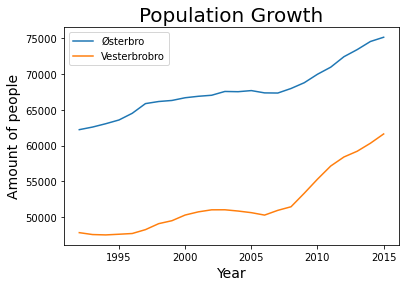

In [29]:
import matplotlib.pyplot as plt

østerbro = dataset[dataset[:,1] == 2] 
vesterbro = dataset[dataset[:,1] == 4]
set_of_years = np.unique(dataset[:,0])

østerbro_pop = np.array([], dtype='int16')
vesterbro_pop = np.array([], dtype='int16')
for year in set_of_years:
    østerbro_pop = np.append(østerbro_pop, np.sum(østerbro[østerbro[:,0] == year][:,4]))
    vesterbro_pop = np.append(vesterbro_pop, np.sum(vesterbro[vesterbro[:,0] == year][:,4]))

print(østerbro_pop)
print(vesterbro_pop)

plt.title("Population Growth", fontsize=20)
plt.plot(set_of_years, østerbro_pop, label="Østerbro")
plt.plot(set_of_years, vesterbro_pop, label="Vesterbrobro")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Amount of people", fontsize=14)
plt.legend(loc=2)
plt.show(block=True)

